In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets

In [2]:
x,y=load_planar_dataset()

In [3]:
x.shape

(2, 400)

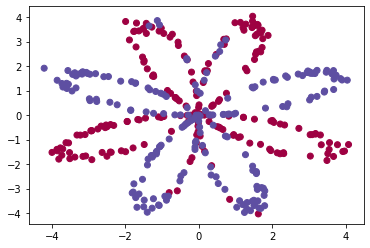

In [4]:
plt.scatter(x[0,:],x[1,:],c=y,cmap=plt.cm.Spectral)

In [5]:
m=x.shape[1]
m

400

In [6]:
lr_model=sklearn.linear_model.LogisticRegressionCV()
lr_model.fit(x.T,y.T)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

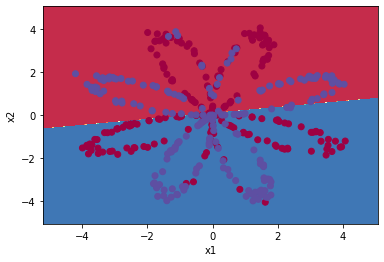

In [7]:
plot_decision_boundary(lambda i: lr_model.predict(i),x,y)
##47% approx

In [30]:
def layer_s(x,y):
    n_x=x.shape[0]
    n_h=5
    n_y=y.shape[0]
    
    return (n_x,n_h,n_y)

In [31]:
def init_params(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    assert(w1.shape==(n_h,n_x))
    assert(w2.shape==(n_y,n_h))
    assert(b1.shape==(n_h,1))
    assert(b2.shape==(n_y,1))
    
    params={
        "w1":w1,
        "w2":w2,
        "b1":b1,
        "b2":b2
        
    }
    return params

In [32]:
def forword_propogation(x,params):
    w1=params["w1"]
    w2=params["w2"]
    b1=params["b1"]
    b2=params["b2"]
    
    z1=np.dot(w1,x)+b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sigmoid(z2)
    
    assert(a2.shape==(1,x.shape[1]))
    
    save={
        "z1":z1,
        "z2":z2,
        "a1":a1,
        "a2":a2
    }
    return a2,save

In [33]:
def cost_compute(a2,y,params):
    m=y.shape[1]
    l=np.dot(y,np.log(a2).T)+np.dot(1-y,np.log(1-a2).T)
    cost=np.float64(-l/m)
    cost=np.squeeze(cost)
    
    assert(isinstance(cost,float))
    return cost

In [34]:
def back_propogation(params,save,x,y):
    m=x.shape[1]
    w1=params["w1"]
    w2=params["w2"]
    b1=params["b1"]
    b2=params["b2"]
    
    a1=save["a1"]
    a2=save["a2"]
    
    dz2=a2-y
    dw2=np.dot(dz2,a1.T)/m
    db2=np.sum(dz2,axis=1,keepdims=True)/m
    dz1=np.dot(w2.T,dz2)*(1-np.power(a1,2))
    dw1=np.dot(dz1,x.T)/m
    db1=np.sum(dz1,axis=1,keepdims=True)/m
    
    
    grad={
        "dw1":dw1,
        "dw2":dw2,
        "db1":db1,
        "db2":db2
    }
    
    return grad

In [35]:
def update_params(params,grad,lr=0.1):
    w1=params["w1"]
    w2=params["w2"]
    b1=params["b1"]
    b2=params["b2"]
    
    dw1=grad["dw1"]
    dw2=grad["dw2"]
    db1=grad["db1"]
    db2=grad["db2"]
    
    w1=w1-lr*dw1
    w2=w2-lr*dw2
    b1=b1-lr*db1
    b2=b2-lr*db2
    
    params={
        "w1":w1,
        "w2":w2,
        "b1":b1,
        "b2":b2
    }
    
    return params

In [36]:
def nn_model(x,y,n_h,num_itr=1000):
    n_x=layer_s(x,y)[0]
    n_y=layer_s(x,y)[2]
    
    params=init_params(n_x,n_h,n_y)
    w1=params["w1"]
    w2=params["w2"]
    b1=params["b1"]
    b2=params["b2"]
    
    for i in range(0,num_itr):
        a2,save=forword_propogation(x,params)
        cost=cost_compute(a2,y,params)
        grad=back_propogation(params,save,x,y)
        params=update_params(params,grad)
        
#         if i%500==0:
#             print(i,cost)
    return params
    

In [37]:
def predict(params,x):
    a2,save=forword_propogation(x,params)
    yp=(a2>0.5)
    return yp

In [38]:
parameters=nn_model(x,y,n_h=8,num_itr=5000)

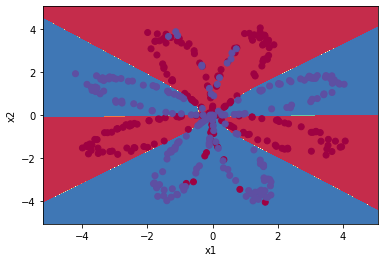

In [39]:
plot_decision_boundary(lambda i: predict(parameters,i.T),x,y)

In [40]:
yp=predict(parameters,x)

In [41]:
print(float((np.dot(y,yp.T)+np.dot(1-y,1-yp.T))/float(y.size)*100))

88.5


1 67.0
2 64.75
3 88.25
4 88.25
5 87.75
10 88.5
20 88.5
50 88.25


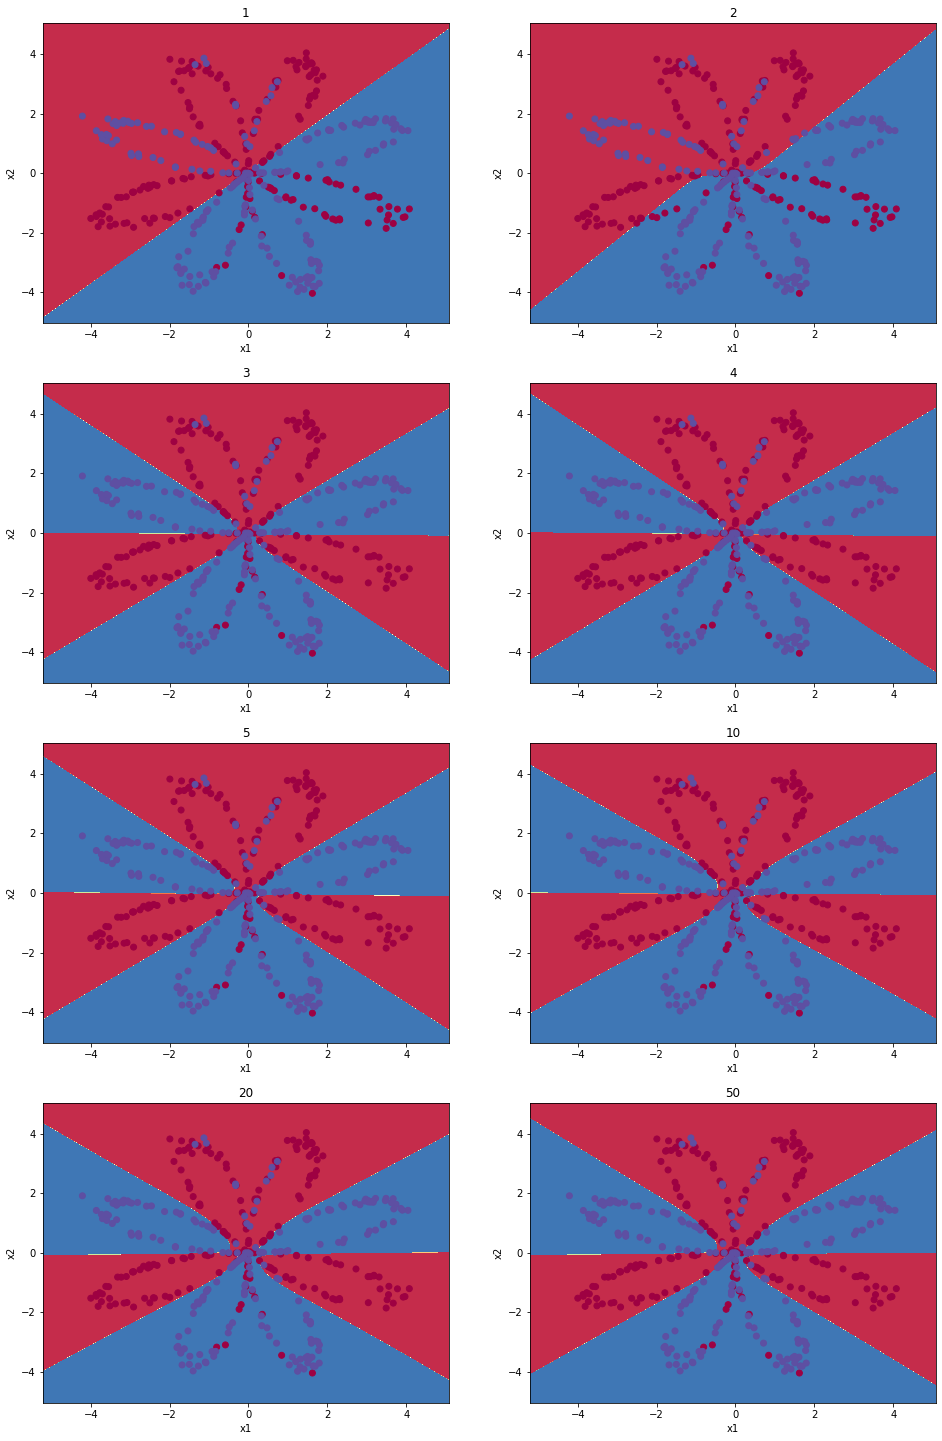

In [42]:
plt.figure(figsize=(16,32))
hidden_layer_node=[1,2,3,4,5,10,20,50]

for i,n_h in enumerate(hidden_layer_node):
    plt.subplot(5,2,i+1)
    plt.title(n_h)
    params=nn_model(x,y,n_h,num_itr=5000)
    plot_decision_boundary( lambda r: predict(params,r.T),x,y)
    yp=predict(params,x)
    acc=(float((np.dot(y,yp.T)+np.dot(1-y,1-yp.T))/float(y.size)*100))
    print(n_h,acc)